In [1]:
# common imports
import numpy as np
import pandas as pd
import os, cv2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# global variables
ROWS = 150
COLUMNS = 150
CHANNELS = 3
CLASSES = {0: 'cat', 1: 'dog'}

# display setup
sns.set(style="whitegrid")  # for plots

# Preface
* Dogs vs. Cats is a dataset containing 25,000 samples.
* Each sample is a colored image (JPEG file) of a dog or a cat. The image sizes vary, so they need to be scaled to the same size.
* The data contains two labels (mentioned in each image file's name), making this a **binary classification** problem.
In other words, this is a **supervised learning** task.
* The model will be trained using all available data and run without learning anymore. This method is named **offline/batch learning**.
* Main objective: Find the best algorithm and model parameters that classify the unused images correctly.


# 1. Getting the Data

In [2]:
train_path = r"dogs-vs-cats\train/"

train_images = [train_path + i for i in os.listdir(train_path)]
# listdir returns a list with the file names in the given directory

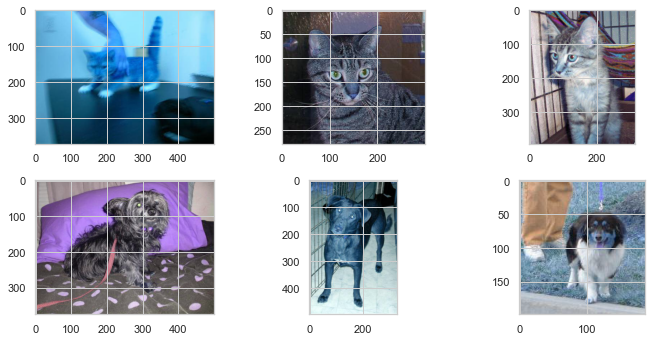

In [3]:
fig = plt.figure(figsize=(10,7))

for i in range(6):
    plt.subplot(330+i+1)
    if i < 3:
        filename = train_path + 'cat.' + str(i) + '.jpg'
    else:
        filename = train_path + 'dog.' + str(i-3) + '.jpg'
    image = cv2.imread(filename)
    plt.imshow(image)
plt.tight_layout()
plt.show()

> Note: In order to use the data for ML algorithms the images need to be processed into an array containing the pixel values.
> The following functions do just that:

In [4]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLUMNS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    m = len(images)
    n_x = ROWS * COLUMNS * CHANNELS
    X = np.ndarray((m, n_x), dtype=np.uint8)
    y = np.zeros((m, 1))

# i is the count of the current iteration
# image_file is the path of the image file at the current iteration
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        X[i, :] = np.squeeze(image.reshape((n_x, 1))) # squeeze removes useless one-dimensional arrays
        if '/dog' in image_file:
            y[i, 0] = 1
        elif '/cat' in image_file:
            y[i, 0] = 0
        else:
            y[i, 0] = image_file.split('/')[-1].split('.')[0]
        if i % 5000 == 0:
            print("Loading: {}/{}".format(i, m))  # print loading progress
    print("Finished Loading Data")
    return X, y

# shuffle(X, y, random_state=42)

In [5]:
X, labels = prep_data(train_images)

Loading: 0/25000
Loading: 5000/25000
Loading: 10000/25000
Loading: 15000/25000
Loading: 20000/25000
Finished Loading Data


In [6]:
X

array([[ 87, 164, 203, ...,   0,   2,   2],
       [ 40,  44,  39, ...,  25,  34,  45],
       [ 43,  34,  30, ...,   3, 168, 173],
       ...,
       [ 46,  49,  54, ..., 109, 149, 191],
       [252, 255, 253, ..., 116, 115, 131],
       [228, 238, 245, ..., 254, 254, 254]], dtype=uint8)

In [7]:
labels

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [8]:
# create a DataFrame including a column for labels
df = pd.concat([pd.DataFrame(labels, columns=['label']), pd.DataFrame(X)], axis=1)
df.head()

,label,0,1,2,3,4,5,6,7,8,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.0,87,164,203,92,169,208,93,170,209,...,2,0,2,2,0,2,2,0,2,2
1,0.0,40,44,39,45,45,41,49,45,41,...,84,25,32,47,31,39,52,25,34,45
2,0.0,43,34,30,26,15,11,35,23,19,...,192,4,193,194,5,184,187,3,168,173
3,0.0,218,223,222,219,224,223,219,224,223,...,217,208,210,214,205,213,215,211,211,217
4,0.0,75,112,140,75,112,140,79,116,144,...,102,70,98,109,57,83,95,56,78,90


In [9]:
def show_images(X, y, index):
    image = X[index]
    image = image.reshape((ROWS, COLUMNS, CHANNELS))
    plt.figure(figsize=(6, 3))
    plt.imshow(image)
    plt.title("This is a {}".format(CLASSES[y[index, 0]]))
    plt.axis('off')
    plt.show()

In [10]:
# for i in range(11):
   # show_images(X, labels, i)

In [11]:
# use groupby to locate instances for each label
label_groups = df.groupby('label')

In [12]:
# 3 cat image samples
sample0 = label_groups.get_group(0)[:3].drop('label', axis = 1)
sample0

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,87,164,203,92,169,208,93,170,209,96,...,2,0,2,2,0,2,2,0,2,2
1,40,44,39,45,45,41,49,45,41,47,...,84,25,32,47,31,39,52,25,34,45
2,43,34,30,26,15,11,35,23,19,56,...,192,4,193,194,5,184,187,3,168,173


In [13]:
# 3 dog image samples
sample1 = label_groups.get_group(1)[:3].drop('label', axis = 1)
sample1

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
12500,127,116,118,118,105,107,125,110,112,148,...,58,102,97,88,89,84,75,76,74,64
12501,176,191,207,81,106,135,82,114,152,81,...,247,231,245,244,233,246,246,230,244,243
12502,66,120,144,50,106,133,41,98,133,28,...,97,82,94,100,82,94,100,83,95,101


In [14]:
df['label'].value_counts()

0.0    12500
1.0    12500
Name: label, dtype: int64

> Observations:
> * By looking at the index numbers for each group, the first instance labeled 1 (dog) is located at index 12500.
> My assumption was that all cat images were the first 12,500 samples, with the rest as dogs.
> To validate my assumptions I counted the values for each class.
> * Why is this important? Data arranged by class order could result in poor performance of the ML algorithms,
> an unrepresentative test set or cross-validation folds later on (i.e., a test set containing only cat images).
> * Solution: The train_test_split() is a random sampling method, so it takes care of this.
> The random_state parameter ensures that the generated shuffled split is the same each time.

In [15]:
# combine cat and dog samples as one DataFrame
sample_images = pd.concat([sample0, sample1], ignore_index=True)

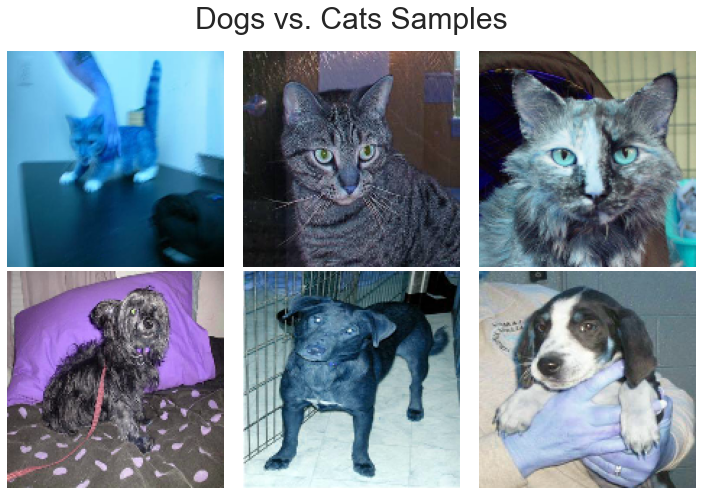

In [16]:
fig = plt.figure(figsize=(10,7))
rows = 2
columns = 3

# add sample image in each iteration
for i in range(rows*columns):
    image = sample_images[i:i+1].to_numpy().reshape((ROWS, COLUMNS, CHANNELS))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
    plt.axis('off')
fig.suptitle("Dogs vs. Cats Samples", size=30)
plt.tight_layout()
plt.show()

> ### Splitting the Data:
>> Before further analysis let's split the data into a training set and a testing set.
>> This will ensure avoidance of bias that could occur from learning the data as a whole.

In [17]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)